<a href="https://colab.research.google.com/github/jiin124/4th_kaggle_study/blob/main/5%EC%A3%BC%EC%B0%A8/%ED%83%9C%EC%96%91%EA%B4%91_%EB%B0%9C%EC%A0%84%EB%9F%89_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')

In [ ]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

In [ ]:
!kaggle competitions download -c 2021mlfinalexamp1

  0% 0.00/314k [00:00<?, ?B/s]
100% 314k/314k [00:00<00:00, 9.69MB/s]
  0% 0.00/6.74k [00:00<?, ?B/s]
100% 6.74k/6.74k [00:00<00:00, 6.82MB/s]
  0% 0.00/27.1k [00:00<?, ?B/s]
100% 27.1k/27.1k [00:00<00:00, 37.0MB/s]


In [ ]:
train=pd.read_csv("train.csv")
sample=pd.read_csv('sample_submit.csv')

In [ ]:
test=pd.read_csv("test.csv")

In [ ]:
train.head()

,Unnamed: 0,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.4,57.76,0,0.000000
1,1,15,0,222,18,1.3,26.82,13,21.957266
2,2,4,0,0,0,2.6,84.94,-6,0.000000
3,3,18,30,0,0,1.5,89.18,2,0.000000
4,4,1,30,0,0,2.4,84.35,12,0.000000


In [ ]:
test.head()

,Unnamed: 0,Hour,Minute,DHI,DNI,WS,RH,T
0,0,6,0,54,548,1.2,72.29,0
1,1,14,0,297,27,8.0,19.07,17
2,2,1,30,0,0,2.9,66.29,1
3,3,19,0,0,0,1.8,63.38,2
4,4,4,30,0,0,1.7,55.61,0


In [ ]:
sample

,INDEX,TARGET
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
995,995,0
996,996,0
997,997,0
998,998,0


회귀를 사용할 예정

In [ ]:
train.columns

Index(['Unnamed: 0', 'Hour', 'Minute', 'DHI', 'DNI', 'WS', 'RH', 'T',
       'TARGET'],
      dtype='object')

In [ ]:
#unnamed 삭제

train=train.drop('Unnamed: 0',axis=1)
test=test.drop('Unnamed: 0',axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hour    9000 non-null   int64  
 1   Minute  9000 non-null   object 
 2   DHI     9000 non-null   object 
 3   DNI     9000 non-null   object 
 4   WS      9000 non-null   object 
 5   RH      8995 non-null   float64
 6   T       9000 non-null   int64  
 7   TARGET  9000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 562.6+ KB


RH에 NULL값이 보인다. 그리고 Minute,DHI,DNI,WS는 왜 object 형식..? 

## EDA

In [ ]:
train['Hour'].value_counts()

10    381
18    380
1     380
22    380
0     378
4     378
5     378
21    377
20    377
12    377
3     377
6     376
9     376
19    376
14    376
8     375
15    374
7     374
23    373
17    373
16    368
13    368
2     364
11    364
Name: Hour, dtype: int64

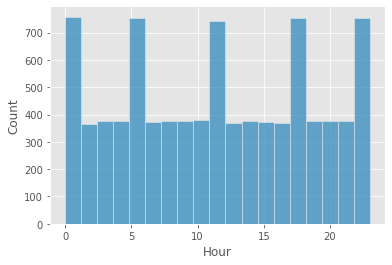

In [ ]:
sns.histplot(data=train,x='Hour')

In [ ]:
train['Minute'].value_counts()

0     4505
30    4494
?        1
Name: Minute, dtype: int64

?값은 뭐임. 0으로 바꿔주겠다. 그리고 object 값이기 때문에 int형으로 바꿔주겠음

In [ ]:
train.loc[train.Minute=='?','Minute']='30'

In [ ]:
train['Minute']=train['Minute'].astype('int')

In [ ]:
train['DHI'].value_counts()

0      4349
67       40
77       39
79       37
96       36
       ... 
379       1
306       1
341       1
502       1
287       1
Name: DHI, Length: 509, dtype: int64

In [ ]:
train['DHI'].unique()

array(['0', '222', '55', '355', '437', '20', '44', '178', '81', '?',
       '405', '103', '266', '108', '71', '59', '242', '182', '189', '16',
       '52', '321', '170', '40', '275', '335', '21', '102', '158', '467',
       '90', '57', '51', '12', '106', '27', '439', '391', '135', '285',
       '475', '185', '72', '93', '84', '65', '445', '253', '32', '180',
       '87', '117', '77', '111', '163', '96', '234', '37', '425', '66',
       '395', '120', '316', '50', '3', '164', '466', '123', '373', '53',
       '272', '76', '58', '371', '75', '9', '114', '151', '137', '98',
       '418', '68', '109', '113', '125', '85', '61', '41', '122', '19',
       '67', '441', '74', '427', '7', '154', '86', '269', '49', '18',
       '28', '134', '95', '455', '297', '97', '36', '273', '259', '56',
       '88', '145', '119', '112', '346', '262', '116', '126', '198',
       '282', '60', '70', '141', '274', '104', '13', '89', '33', '357',
       '286', '462', '80', '203', '305', '412', '91', '100', '302', 

왜 object 형인지 모르겠군. ?를 지워주고 int형으로 바꾼다. 

In [ ]:
train.loc[train.DHI=='?','DHI']='0'

In [ ]:
train['DHI']=train['DHI'].astype('int')

In [ ]:
train.columns

Index(['Hour', 'Minute', 'DHI', 'DNI', 'WS', 'RH', 'T', 'TARGET'], dtype='object')

In [ ]:
train['DNI'].value_counts()

0       5086
13        35
18        29
8         29
16        26
        ... 
1027       1
764        1
675        1
259        1
269        1
Name: DNI, Length: 987, dtype: int64

In [ ]:
train.loc[train.DNI=='?','DNI']='0'

In [ ]:
train['DNI']=train['DNI'].astype('int')

In [ ]:
train['WS'].value_counts()

1.6    338
1.5    328
1.7    328
2      326
1.8    315
      ... 
6.9      2
8        1
7.5      1
7        1
?        1
Name: WS, Length: 79, dtype: int64

In [ ]:
train.loc[train.WS=='?','WS']='1.6'

In [ ]:
train['WS']=train['WS'].astype('float')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hour    9000 non-null   int64  
 1   Minute  9000 non-null   int64  
 2   DHI     9000 non-null   int64  
 3   DNI     9000 non-null   int64  
 4   WS      9000 non-null   float64
 5   RH      8995 non-null   float64
 6   T       9000 non-null   int64  
 7   TARGET  9000 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 562.6 KB


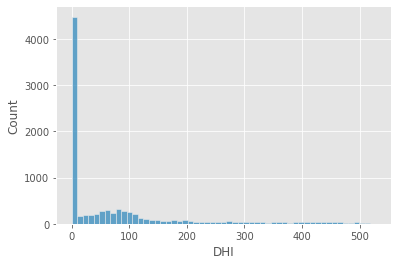

In [ ]:
sns.histplot(data=train,x='DHI')

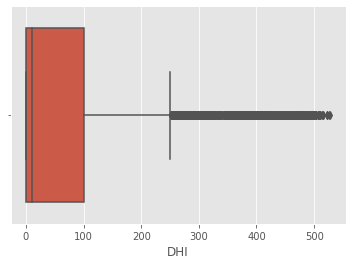

In [ ]:
sns.boxplot(data=train,x='DHI')

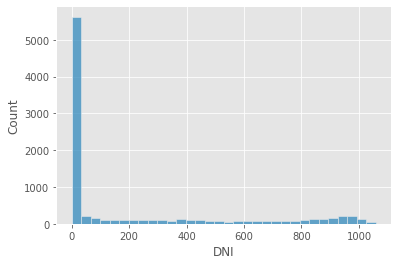

In [ ]:
sns.histplot(data=train,x='DNI')

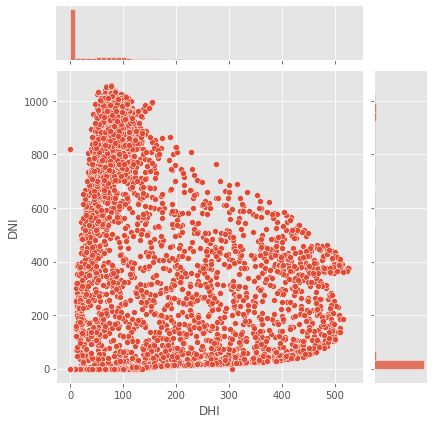

In [ ]:
sns.jointplot(data=train,x='DHI',y='DNI')

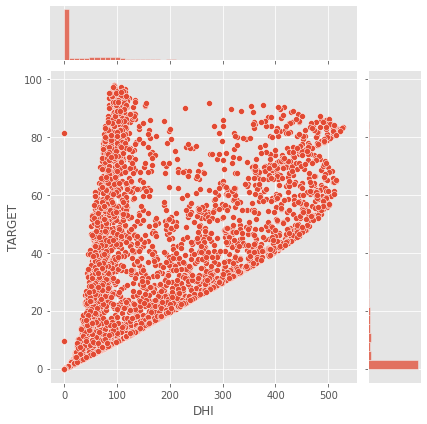

In [ ]:
sns.jointplot(data=train,x='DHI',y='TARGET')

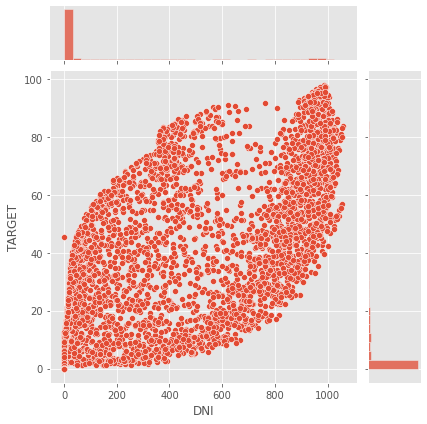

In [ ]:
sns.jointplot(data=train,x='DNI',y='TARGET')

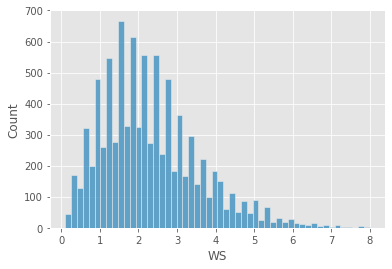

In [ ]:
sns.histplot(data=train,x='WS')

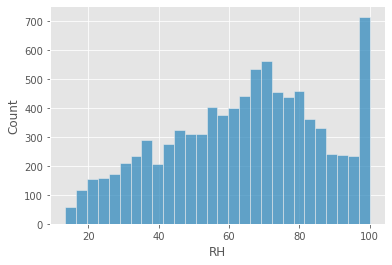

In [ ]:
sns.histplot(data=train,x='RH')#상대습도

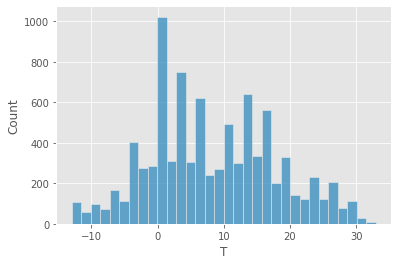

In [ ]:
sns.histplot(data=train,x='T')#기온

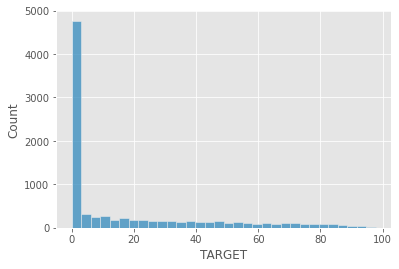

In [ ]:
sns.histplot(data=train,x='TARGET')#타겟

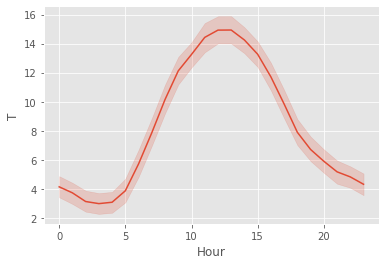

In [ ]:
sns.lineplot(data=train,
             x='Hour',
             y='T'
             )

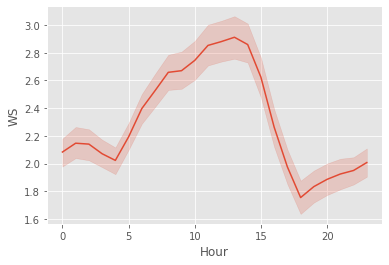

In [ ]:
sns.lineplot(data=train,
             x='Hour',
             y='WS'
             )

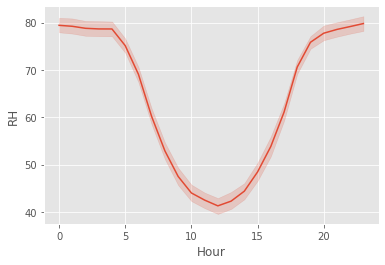

In [ ]:
sns.lineplot(data=train,
             x='Hour',
             y='RH'
             )

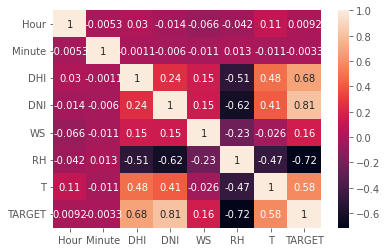

In [ ]:
sns.heatmap(train.corr(),annot=True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hour    1000 non-null   object 
 1   Minute  1000 non-null   object 
 2   DHI     1000 non-null   object 
 3   DNI     1000 non-null   int64  
 4   WS      1000 non-null   float64
 5   RH      995 non-null    float64
 6   T       1000 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [ ]:
test['Hour'].value_counts()

2     54
11    52
13    48
16    48
7     44
23    43
17    43
15    42
6     42
8     41
3     41
9     40
0     40
4     40
5     40
19    40
12    39
20    39
21    39
14    39
1     38
18    36
22    36
10    35
?      1
Name: Hour, dtype: int64

In [ ]:
#test도 똑같이 
test.loc[test.Hour=='?','Hour']='2'
test['Hour']=test['Hour'].astype('int')


In [ ]:
test['Minute'].value_counts()

30    504
0     495
?       1
Name: Minute, dtype: int64

In [ ]:
test.loc[test.Minute=='?','Minute']='30'
test['Minute']=test['Minute'].astype('int')

In [ ]:
test['DHI'].value_counts()

0      476
55       7
52       6
73       6
20       6
      ... 
471      1
321      1
370      1
415      1
350      1
Name: DHI, Length: 274, dtype: int64

In [ ]:
test.loc[test.DHI=='?','DHI']='0'
test['DHI']=test['DHI'].astype('int')

In [ ]:
#NULL값 없애주기
train.isna().sum()

Hour      0
Minute    0
DHI       0
DNI       0
WS        0
RH        5
T         0
TARGET    0
dtype: int64

In [ ]:
train['RH'].value_counts()

100.00    495
67.77      10
77.04      10
78.48       7
80.33       7
         ... 
24.16       1
78.76       1
98.02       1
27.00       1
87.78       1
Name: RH, Length: 4977, dtype: int64

In [ ]:
train=train.fillna(train.mean())

In [ ]:
train.isna().sum()

Hour      0
Minute    0
DHI       0
DNI       0
WS        0
RH        0
T         0
TARGET    0
dtype: int64

In [ ]:
test.isna().sum()

Hour      0
Minute    0
DHI       0
DNI       0
WS        0
RH        5
T         0
dtype: int64

In [ ]:
test=test.fillna(test.mean())

In [ ]:
test.isna().sum()

Hour      0
Minute    0
DHI       0
DNI       0
WS        0
RH        0
T         0
dtype: int64

### 나눠주기

In [ ]:
X_train=train.drop('TARGET',axis=1)
y_train=train['TARGET']
X_test=test

In [ ]:

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


In [ ]:
#스케일링 진행
st=StandardScaler()
scaled_train=st.fit_transform(X_train)
scaled_test=st.transform(X_test)

In [ ]:
scaled_train=pd.DataFrame(scaled_train,columns=X_train.columns)
scaled_train

,Hour,Minute,DHI,DNI,WS,RH,T
0,-1.659316,-0.998890,-0.645430,-0.624463,-0.719323,-0.292412,-0.862780
1,0.504926,-0.998890,1.217891,-0.570456,-0.798744,-1.700213,0.497999
2,-1.082185,-0.998890,-0.645430,-0.624463,0.233727,0.944305,-1.490832
3,0.937774,1.001112,-0.645430,-0.624463,-0.639902,1.137229,-0.653430
4,-1.515034,1.001112,-0.645430,-0.624463,0.074885,0.917459,0.393323
...,...,...,...,...,...,...,...
8995,-0.072206,-0.998890,1.360577,-0.576457,-1.195848,-1.783935,1.544751
8996,-1.226468,1.001112,-0.645430,-0.624463,2.616352,1.073527,-0.967456
8997,-0.649337,-0.998890,0.227477,0.950728,0.392568,-0.744692,0.288648
8998,1.514905,-0.998890,-0.645430,-0.624463,0.789673,0.360527,-0.862780


In [ ]:
scaled_test=pd.DataFrame(scaled_test,columns=X_test.columns)
scaled_test

,Hour,Minute,DHI,DNI,WS,RH,T
0,-0.793620,-0.998890,-0.192190,1.019737,-0.878165,0.368717,-0.862780
1,0.360643,-0.998890,1.847391,-0.543453,4.522452,-2.052846,0.916700
2,-1.515034,1.001112,-0.645430,-0.624463,0.471989,0.095711,-0.758105
3,1.082057,-0.998890,-0.645430,-0.624463,-0.401640,-0.036697,-0.653430
4,-1.082185,1.001112,-0.645430,-0.624463,-0.481061,-0.390239,-0.862780
...,...,...,...,...,...,...,...
995,0.649208,1.001112,-0.049503,1.529798,1.027935,-1.379431,0.393323
996,-0.793620,1.001112,0.042824,1.223761,-1.434111,0.647638,-0.339404
997,0.216360,-0.998890,0.588390,1.916845,-0.163377,-0.844794,0.079297
998,-0.216488,1.001112,1.008057,0.779707,-0.481061,-0.698736,0.183973


In [ ]:
params={
    'n_estimators':[100,400,500],
    'max_depth':[1,3,5],
    'subsample':[0.3,0.5],
    'colsample_bytree':[0.5,0.8,1]}

xgb=XGBRegressor(random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(xgb,param_grid=params,cv=3,n_jobs=-1)
grid_cv.fit(scaled_train,y_train)

print("최적 하이퍼 파라미터: ",grid_cv.best_params_)
print("최고 예측 정확도 : ",grid_cv.best_score_)

[12:27:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최적 하이퍼 파라미터:  {'colsample_bytree': 1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}
최고 예측 정확도 :  0.9970234498311573


In [ ]:
xgb_1=XGBRegressor(colsample_bytree= 1, max_depth=5, n_estimators= 500, subsample= 0.5,
                   random_state=0)

xgb_1.fit(scaled_train,y_train)
pred=xgb_1.predict(scaled_test)

[12:46:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
sample

,INDEX,TARGET
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
995,995,0
996,996,0
997,997,0
998,998,0


In [ ]:
submit_1=sample.copy()


In [ ]:

submit_1

,INDEX,TARGET
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
995,995,0
996,996,0
997,997,0
998,998,0


In [ ]:
submit_1['TARGET']=pred

In [ ]:
submit_1.to_csv('submit1.csv',index=False)

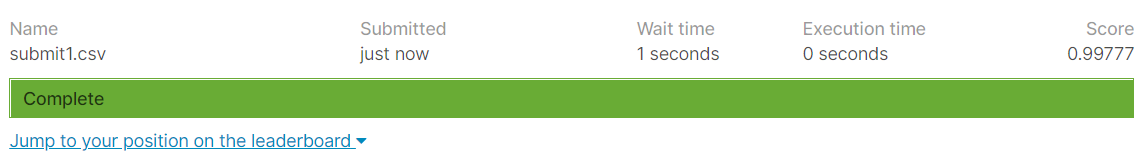